# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Nasywan Azrial Fariqin
- **Email:** m012d4ky2301@bangkit.academy
- **ID Dicoding:** nasywan22

## Tentang Dataset


Sistem berbagi sepeda adalah generasi baru dari persewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang mencakup lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan dan kesehatan.

Terlepas dari penerapan sistem bike sharing di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas dalam kota. Oleh karena itu, diharapkan sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.
Informasi Atribut:
Hour.csv dan day.csv memiliki kolom berikut, kecuali hr yang tidak tersedia di day.csv

instan: rekor indeks

hari ini : tanggal

musim : musim (1:musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)
thn : tahun (0: 2011, 1:2012)

bulan: bulan (1 hingga 12)

jam : jam (0 hingga 23)

hari libur : hari cuaca sedang libur atau tidak (disarikan dari [Web Link])

hari kerja : hari dalam seminggu

hari kerja : jika hari bukan akhir pekan atau hari libur adalah 1, sebaliknya adalah 0.

cuaca :
1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

temp : Suhu normal dalam Celcius. Nilai diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala per jam)

atemp: Menormalkan suhu perasaan dalam Celsius. Nilai diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala per jam)

Kelembaban normalisasi: Kelembapan yang dinormalisasi. Nilainya dibagi menjadi 100 (maks)

kecepatan angin: Kecepatan angin yang dinormalisasi. Nilainya dibagi menjadi 67 (maks)

casual: jumlah pengguna biasa

terdaftar: jumlah pengguna terdaftar

cnt: hitungan total sewa sepeda termasuk casual dan terdaftar
untuk informasi lebih lanjut silahkan melalui link berikut,
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 | **Hubungan Kondisi Cuaca dan Penggunaan**
   
  Bagaimana kondisi cuaca seperti suhu, kelembaban, dan kecepatan angin mempengaruhi jumlah sepeda yang disewa?

- Pertanyaan 2 | **Pengaruh Hari Libur dan Hari Kerja**

  Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan atau hari libur?

## Import Semua Packages/Library yang Digunakan

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [63]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

####Menilai tabel `day_df`

In [65]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [66]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [67]:
print ('jumlah duplikasi : ', day_df.duplicated().sum())

jumlah duplikasi :  0


In [68]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####Menilai tabel `hour_df`

In [69]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [70]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [71]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [72]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **ANALISA SINGKAT**
Setelah menilai data, dapat dilihat bahwa:

- Tidak ada nilai yang hilang di kedua dataset (day.csv dan hour.csv).

- Tipe data terlihat sesuai untuk analisis lebih lanjut, dengan dteday sebagai objek yang perlu diubah menjadi tipe datetime (data tanggal).

- Tidak ada baris duplikat di kedua dataset.

### Cleaning Data

####Membersihkan tabel `day_df`

In [73]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#####Memperbaiki tipe data

In [74]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


In [75]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

####Membersihkan tabel `hour_df`

#####Memperbaiki tipe data

In [76]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [77]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [78]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore `day_df` (Penyewaan harian)

- Hubungan kondisi cuaca dan penggunaan (harian)

In [79]:
# Menggunakan korelasi Pearson untuk melihat hubungan linear antara kondisi cuaca dan jumlah penyewaan
weather_usage_correlation_day = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
weather_usage_correlation_day

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


- Analisa singkat
 - Suhu (temp) dan Suhu Terasa (atemp): Kedua variabel ini memiliki korelasi positif yang kuat dengan jumlah penyewaan (cnt), dengan nilai korelasi sekitar 0.63. Ini menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa.

 - Kelembapan (hum): Kelembapan memiliki korelasi negatif yang lemah dengan jumlah penyewaan, dengan nilai korelasi sekitar -0.10. Artinya, kelembapan tinggi cenderung sedikit menurunkan jumlah penyewaan sepeda, tetapi pengaruhnya tidak terlalu kuat.

 - Kecepatan Angin (windspeed): Kecepatan angin juga memiliki korelasi negatif dengan jumlah penyewaan, dengan nilai korelasi sekitar -0.23. Ini menunjukkan bahwa kecepatan angin yang lebih tinggi cenderung sedikit mengurangi jumlah penyewaan sepeda.

- pengaruh hari libur dan hari kerja (harian)

In [80]:
# Menghitung rata-rata penyewaan pada hari kerja dan bukan hari kerja
day_df['day_type'] = day_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan/Hari Libur')
avg_rentals_by_day_type_day = day_df.groupby('day_type')['cnt'].mean().reset_index()
avg_rentals_by_day_type_day

,day_type,cnt
0,Akhir Pekan/Hari Libur,4330.168831
1,Hari Kerja,4584.820000


- Analisa singkat
 - Rata-rata jumlah penyewaan sepeda pada hari kerja adalah 4,584.82, sedangkan pada akhir pekan/hari libur rata-rata jumlah penyewaan sepeda adalah 4,330.17. Ini menunjukkan bahwa terdapat perbedaan rata-rata jumlah penyewaan sepeda antara hari kerja dan akhir pekan/hari libur, dengan hari kerja memiliki rata-rata penyewaan yang sedikit lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana kondisi cuaca seperti suhu, kelembaban, dan kecepatan angin mempengaruhi jumlah sepeda yang disewa?

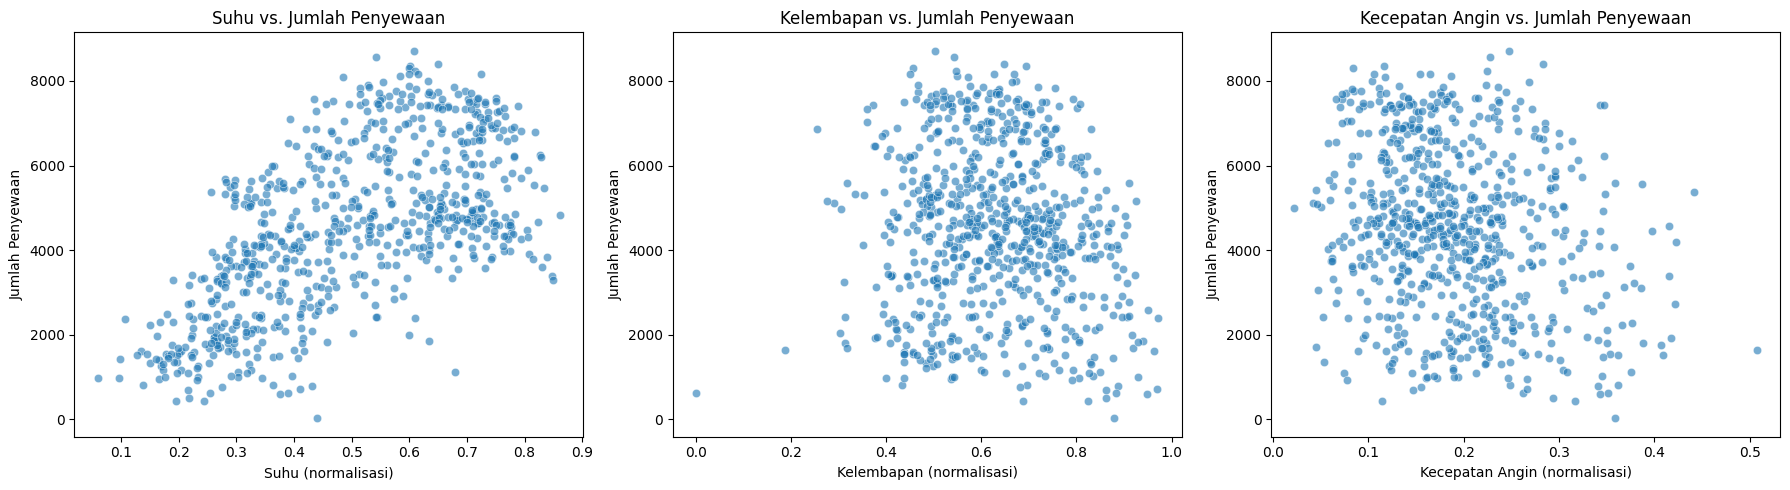

In [81]:
# Set-up visualisasi
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Suhu vs. Jumlah Penyewaan
sns.scatterplot(ax=axes[0], x='temp', y='cnt', data=day_df, alpha=0.6)
axes[0].set_title('Suhu vs. Jumlah Penyewaan')
axes[0].set_xlabel('Suhu (normalisasi)')
axes[0].set_ylabel('Jumlah Penyewaan')

# Kelembapan vs. Jumlah Penyewaan
sns.scatterplot(ax=axes[1], x='hum', y='cnt', data=day_df, alpha=0.6)
axes[1].set_title('Kelembapan vs. Jumlah Penyewaan')
axes[1].set_xlabel('Kelembapan (normalisasi)')
axes[1].set_ylabel('Jumlah Penyewaan')

# Kecepatan Angin vs. Jumlah Penyewaan
sns.scatterplot(ax=axes[2], x='windspeed', y='cnt', data=day_df, alpha=0.6)
axes[2].set_title('Kecepatan Angin vs. Jumlah Penyewaan')
axes[2].set_xlabel('Kecepatan Angin (normalisasi)')
axes[2].set_ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

### Pertanyaan 2:
Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan atau hari libur?

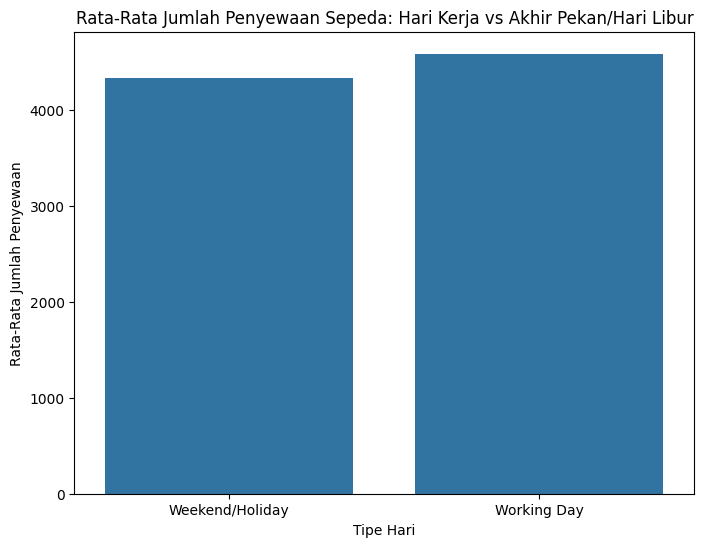

In [82]:
# Menyiapkan data untuk visualisasi
day_df['is_workingday'] = day_df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Weekend/Holiday')

# Menghitung rata-rata jumlah penyewaan untuk hari kerja dan akhir pekan/hari libur
average_rentals_by_day_type = day_df.groupby('is_workingday')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='is_workingday', y='cnt', data=average_rentals_by_day_type)
plt.title('Rata-Rata Jumlah Penyewaan Sepeda: Hari Kerja vs Akhir Pekan/Hari Libur')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
plt.show()


## Conclusion

- Conclution pertanyaan 1 | **Hubungan Kondisi Cuaca dan Penggunaan**

Suhu berpengaruh positif terhadap keputusan penyewaan sepeda, dengan suhu yang lebih hangat menghasilkan lebih banyak penyewaan. Kelembapan dan kecepatan angin tampaknya memiliki pengaruh yang lebih kecil dan kurang jelas terhadap jumlah penyewaan sepeda.

- Conclution pertanyaan 2 | **Pengaruh Hari Libur dan Hari Kerja**

Tidak ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan/hari libur, menunjukkan bahwa kebiasaan penyewaan sepeda cukup konsisten terlepas dari jenis hari.
